<a href="https://colab.research.google.com/github/luciabelengonzalez/Master-BigData-USC/blob/master/GonzalezGiaimo_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web titulada "List of countries by past and future population" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [1]:
# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [2]:
# Ojo, en este documento html el separador de miles es una coma
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population"

html = pd.read_html(url, thousands="," )[:3]

# Imprimimos el número de tablas que hemos leído con datos de países mediante la función len(). Deberían ser 3.
print(f'El número de tablas que hemos leído es: {len(html)}')

El número de tablas que hemos leído es: 3


## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [3]:
# Reunimos las tres tablas en una sola.

df = reduce(lambda x, y: pd.merge(x, y, on = 'Country (or dependent territory)'), html).set_index('Country (or dependent territory)')


# Imprimimos las primeras filas a modo de comprobación, mediante head()

print(df.head())

# Generamos una lista con la información almacenada en las columnas mediante list()

columnas = list(df.columns)

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric() 
# Puede ser útil el utilizar la noción de 'list comprehension' por sencillez

columnas_numeric = [i for i in columnas if i.isnumeric()]

# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto

df_numeric = df[columnas_numeric]

print(df_numeric.head())

                                  1950  1955   %_x  ...   %.5   2050  %.6_y
Country (or dependent territory)                    ...                    
Afghanistan                       8151  8892  1.76  ...  1.61  63796   1.49
Albania                           1228  1393  2.56  ... -0.55   2825  -0.61
Algeria                           8893  9842  2.05  ...  0.71  55445   0.57
American Samoa                      20    20  0.72  ... -0.29     50  -0.06
Andorra                              7     7  0.04  ... -0.69     75  -0.93

[5 rows x 41 columns]
                                  1950  1955   1960  ...   2040   2045   2050
Country (or dependent territory)                     ...                     
Afghanistan                       8151  8892   9830  ...  54717  59256  63796
Albania                           1228  1393   1624  ...   2994   2913   2825
Algeria                           8893  9842  10910  ...  52030  53894  55445
American Samoa                      20    20     21  ..

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [4]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
subtabla = df_numeric.loc[['Germany', 'Andorra', 'Angola'], ['2015', '2020', '2025']]

print('subtabla')
print(subtabla)

subtabla
                                   2015   2020   2025
Country (or dependent territory)                     
Germany                           80855  82983  80027
Andorra                              86     86     86
Angola                            19626  22485  25674


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [5]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
subtabla = df_numeric.iloc[2:8, 4:9]

print('subtabla')
print(subtabla)

subtabla
                                   1970   1975   1980   1985   1990
Country (or dependent territory)                                   
Algeria                           13932  16141  18807  22009  25191
American Samoa                       28     30     33     39     48
Andorra                              20     27     34     45     53
Angola                             5606   6051   7206   8390   9486
Anguilla                              7      7      7      7      9
Antigua and Barbuda                  66     69     69     65     65


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [6]:
# Creamos una columna mediante selección por el título de la columna
pob_1955 = df_numeric['1955']

print('Población de 1955')
print(pob_1955)

Población de 1955
Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: int64


### Ejercicio 4
Imprimir los datos de la fila número 15.

In [7]:
# Seleccionamos una fila mediante la opción .iloc
print('fila')
print(df_numeric.iloc[14])

fila
1950     71
1955     88
1960    113
1965    140
1970    171
1975    190
1980    210
1985    229
1990    246
1995    266
2000    283
2005    297
2010    311
2015    325
2020    338
2025    350
2030    359
2035    365
2040    369
2045    372
2050    372
Name: Bahamas, dtype: int64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [8]:
# Seleccionamos una celda mediante la opción .loc
print(df_numeric.loc[['Barbados'], ['1995']])

                                  1995
Country (or dependent territory)      
Barbados                           268


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [9]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
df_numeric = df_numeric.drop('World')

# Utilizamos la función max() para calcular el máximo
print (max(df_numeric['1975']))

# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
print (df_numeric['1975'].idxmax())


920295
China


### Ejercicio 7
Imprimir los nombres de las filas.

In [10]:
# Utilizamos la opción .index
print('países')
print (df_numeric.index)

países
Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib.

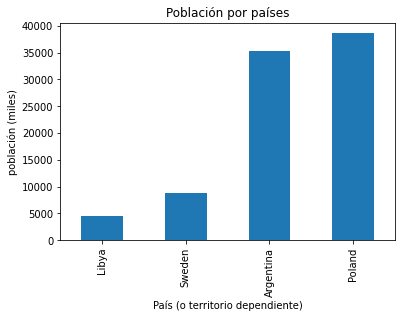

In [11]:
# Generamos una lista con los nombres de los países del enunciado
paises = ['Argentina', 'Sweden', 'Poland', 'Libya']

# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos

subtabla = df_numeric.loc[paises, ['1995']]

# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    

subtabla = subtabla.sort_values(by='1995')

subtabla.plot(kind='bar', legend=False)

# Podemos utilizar plt.ylabel() para especificar 'población (miles)'

plt.ylabel('población (miles)')

# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
plt.xlabel('País (o territorio dependiente)')

plt.title('Población por países')

plt.show()

## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

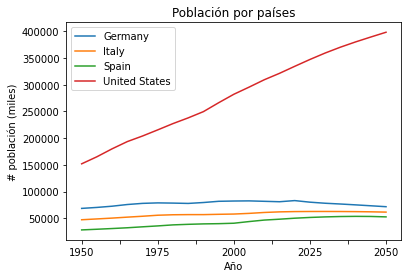

In [12]:
# Generamos una lista con los nombres de los países del enunciado
paises_v2 = ['Germany', 'Spain', 'United States', 'Italy']

# Generamos la subtabla correspondiente con la opción .loc
subtabla_v2 = df_numeric.loc[paises_v2]

subtabla_v2 = subtabla_v2.reset_index()

reshaped_subtabla_v2 = pd.melt(subtabla_v2, var_name="year", id_vars=["Country (or dependent territory)"], value_vars=['1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050'])
subtabla_v2 = reshaped_subtabla_v2.pivot(index='year', columns="Country (or dependent territory)", values='value')

# Utilizamos la función plot(kind='line') para dibujar

subtabla_v2.plot(kind='line')

# Etiquetamos con plt.xlabel() y plt.ylabel()

plt.xlabel('Año')
plt.ylabel('# población (miles)')
plt.legend(loc='upper left')
plt.title('Población por países')
plt.show()


## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

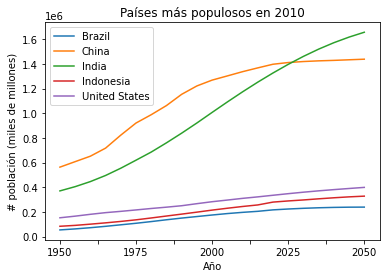

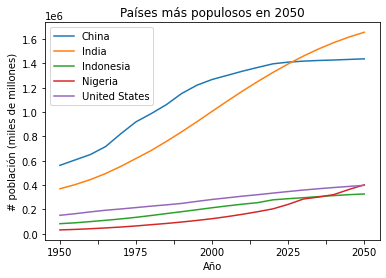

In [13]:
# Definimos la funión plot_populosos()
def plot_populosos(taboa, ano):
    
    # Ordenamos la tabla según el año
    subtabla = taboa.sort_values(by=ano, ascending=False)

    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres

    names = subtabla.iloc[:5]
    names = names.index
    subtabla_v2 = subtabla.loc[names]

    subtabla_v2 = subtabla_v2.reset_index()

    reshaped_subtabla_v2 = pd.melt(subtabla_v2, var_name="year", id_vars=["Country (or dependent territory)"], value_vars=['1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005', '2010', '2015', '2020', '2025', '2030', '2035', '2040', '2045', '2050'])
    subtabla_v2 = reshaped_subtabla_v2.pivot(index='year', columns="Country (or dependent territory)", values='value')

    # Utilizamos la función plot(kind='line') para dibujar

    subtabla_v2.plot(kind='line')

    # Etiquetamos con plt.xlabel() y plt.ylabel()

    plt.xlabel('Año')
    plt.ylabel('# población (miles de millones)')
    plt.legend(loc='upper left')
    plt.title(f'Países más populosos en {ano}')
    plt.show()    

# Aquí invocamos la función plot_populosos()

plot_populosos(df_numeric, '2010')
plot_populosos(df_numeric, '2050')